#                             ABSTRACT 
The most reliable test of education standard for a nation is student performances in tests. In this project, some features(economic,social,personal) were examined along with students' test scores in three Subjects:Maths,Writing, and Reading to show how they (the features) affect performances of students .Inherent statistical properperties of the scores in the three Subjects were evaluated and used to extract insights from the data as how the external economic, social, and, attitude to studies(personal) features influence the performances of 1000 students as contained in KAGGLE's StudentsPerformance dataset. Analysis showed that students on lunch had higher average score than those deprived.In the same vein, students from highly educated parents are better in terms of performance.And lastly, analysis also revealed that students that underwent test preparation course were better. This analysis is a useful tool in designing counselling guides for students. 

# INTRODUCTION
The quality of life in a country is a subject of how quality the education is in that country.Going by this notion, analysis should be done to examine the quality status of education once a while. There has not been an alternative way of evaluating standard of education than examining students' performances in examinations, in spite of the contrary argument that 'examination is not a true test of knowledge.
This project used a popular KAGGLE's dataset StudentsPerformance.csv to extract insights from records of 1000 students in different social, economic, and personal conditions. 

__AIMS:__
The aim of the project is to get first-hand insights from the data into the effects of social, economic, and personal features on the perfomances of students in three Subjects:Writing, Reading, and Maths.

__OBJECTIVES__
The objective of the project is to get the required dataset, perform uni- and multivariate statistical analysis on the data, and to report insights.


# DATA PREPARATION

In [1]:
#Import tools for analytical processes 
import numpy as np, matplotlib.pyplot as mp,pandas as pd
import seaborn as sn

In [2]:
#Import dataset from local directory
studentsPerf=pd.read_csv('StudentsPerformance.csv')

#view 5 top rows of the dataset and print the shape
#print shape
print('The shape of student performance data:')
print(studentsPerf.shape)

#View data
studentsPerf.head()

The shape of student performance data:
(1000, 8)


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
#Check infomation about column names and data types
studentsPerf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [4]:
#Check whether there are missing values in the dataset
print('check missing data values :')
print(studentsPerf.isnull().sum())

#View summary of the inherent statistical properties of dataset
print('Check Data set statistics below:')
studentsPerf.describe()

check missing data values :
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64
Check Data set statistics below:


,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


The statistics table above show the mean score for each test, the minimum, the maximum scores, the standard deviations, upper and lower quartiles.Values of means are close; same for standard deviation. This shows approximate stationarity of the data. 

In [5]:
#Let's extract performance indices:subject scores
Indices=studentsPerf[studentsPerf.describe().columns.values]
print(Indices.shape)
Indices.head()

(1000, 3)


,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75


In [6]:
#Let's create a single performance criterion: average score
Indices['AverageScore']=round(Indices.mean(axis=1),2)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [7]:
#View the new indices table
Indices.head()

,math score,reading score,writing score,AverageScore
0,72,72,74,72.67
1,69,90,88,82.33
2,90,95,93,92.67
3,47,57,44,49.33
4,76,78,75,76.33


# UNIVARIATE ANALYSIS

In [8]:
"""
Let's print the maximum,minimum values and standard deviation of the singular
performance criterion
"""
print('Maximum value of performance criterion: %d'%Indices['AverageScore'].max()),
print('Minimum value of performance criterion: %d'% Indices['AverageScore'].min()),
print('Standard Deviation of performance criterion: %d'%round(Indices['AverageScore'].std(),1))

Maximum value of performance criterion: 100
Minimum value of performance criterion: 9
Standard Deviation of performance criterion: 14


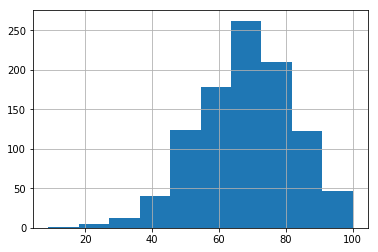

In [9]:
#Let's view the distribution of the criterion
Indices['AverageScore'].hist()
mp.show()

Although skewed slightly to the negative, the distribution is approximately normal as expected of any random event

# MULTIVARIATE ANALYSIS

In [10]:
#Correlation among the three scores
Indices.corr()

,math score,reading score,writing score,AverageScore
math score,1.000000,0.817580,0.802642,0.918744
reading score,0.817580,1.000000,0.954598,0.970331
writing score,0.802642,0.954598,1.000000,0.965669
AverageScore,0.918744,0.970331,0.965669,1.000000


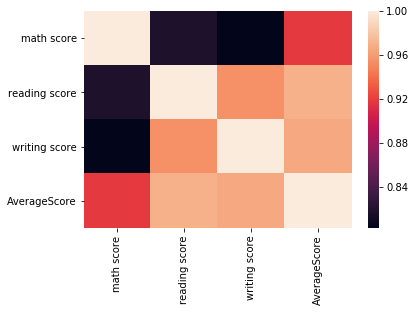

In [11]:
sn.heatmap(Indices.corr())
mp.show()

The correlation values and heatmap above show strong  correlation among variables, hence justifies my decision to create a singular representative of the three different scores as perfomance evaluation criterion. Correlation between two variable shows one can stand for the other. And when two or more variables are correlated, average of the variables is also correlated to them.

In [12]:
#Let's now move the performance criterion column in table Indices
#to our initial table and view
studentsPerf['AverageScore']=Indices['AverageScore']
studentsPerf.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,AverageScore
0,female,group B,bachelor's degree,standard,none,72,72,74,72.67
1,female,group C,some college,standard,completed,69,90,88,82.33
2,female,group B,master's degree,standard,none,90,95,93,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.33
4,male,group C,some college,standard,none,76,78,75,76.33


In [13]:
#Let's group performance by column 'lunch' and aggregate our criterion to see
#effect of launch taking on performance
Effect_of_lunch_on_performance=studentsPerf.groupby(
    by='lunch')['AverageScore'].aggregate(np.mean)
round(Effect_of_lunch_on_performance,2)

lunch
free/reduced    62.20
standard        70.84
Name: AverageScore, dtype: float64

#### SUMMARY OF RESULTS
=======================

|Level|Average Score|
|--|--|
|free/reduced|62.20|
|standard|70.84|

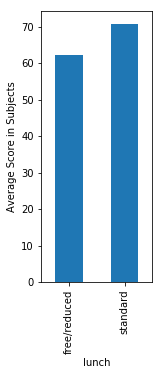

In [14]:
mp.figure(figsize=(2,5))
Effect_of_lunch_on_performance.plot(kind='bar')
mp.ylabel('Average Score in Subjects')
mp.show()

As we can see from values and plot above, standard launch is important for improved performance

In [15]:
#Let's group performance by column 'parental level of education' and aggregate
#our criterion to see effect of parental level of education on performance
Effect_of_parental_level_of_education_on_performance=studentsPerf.groupby(
    by='parental level of education')['AverageScore'].aggregate(np.mean)
round(Effect_of_parental_level_of_education_on_performance,2)

parental level of education
associate's degree    69.57
bachelor's degree     71.92
high school           63.10
master's degree       73.60
some college          68.48
some high school      65.11
Name: AverageScore, dtype: float64

#### SUMMARY OF RESULTS
=======================

|Level|Average Score|
|--|--|
|associate's degree|69.57|
|bachelor's degree|71.92|
|high school |63.10|
|master's degree|73.60|
|some college|68.48|
|some high school |65.11|

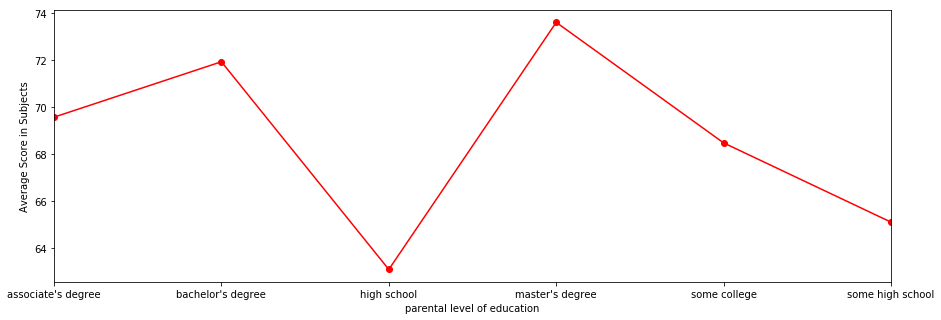

In [16]:
mp.figure(figsize=(15,5))
Effect_of_parental_level_of_education_on_performance.plot(marker='o',color='r')
mp.ylabel('Average Score in Subjects')
mp.show()

The plot above clearly shows influence of parients' education level on 
performance of students. Students whose parients are highly educated had better average performance in the Subjects.

In [17]:
#Let's group performance by column 'test preparation course' and aggregate
#our criterion to see effect of test preparation course on performance
Effect_of_test_preparation_course_on_performance=studentsPerf.groupby(
    by='test preparation course')['AverageScore'].aggregate(np.mean)
round(Effect_of_test_preparation_course_on_performance,2)
  

test preparation course
completed    72.67
none         65.04
Name: AverageScore, dtype: float64

#### SUMMARY OF RESULTS
=======================

|Level|Average Score|
|--|--|
|Completed|76.67|
|None|65.04|

Text(0.5, 0, 'Average Score in Subjects')

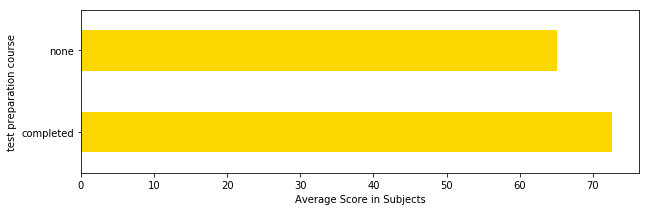

In [18]:
mp.figure(figsize=(10,3))
Effect_of_test_preparation_course_on_performance.plot(kind='barh',color='gold')
mp.xlabel('Average Score in Subjects')

# CONCLUSION AND RECOMMENDATION
 The project used statistical analysis to extract insights from  KAGGLE's StudentPerformance dataset. And the analysis showed that all the three external features examined have significant effects on students' average scores in the three Subjects and consequently have effects on students perfomance.
Based on this, it is recommended that students be fed standard launch and be enrolled for test prep course. In addition students from less educated parents should have external mentors for encouragements.